In [1]:
! pip install np
! pip install sklearn
! pip install sklearn_nature_inspired_algorithms==0.4.3

In [2]:
from sklearn.metrics import classification_report

# Hyper-Parameter Tunning Using Nature Inspired Algorithms 

In this notebook we will compare the performance of several nature inspired search on hyper-parameter tunning task.

We will use [CoverType](https://archive.ics.uci.edu/ml/datasets/covertype) dataset which can be used for classification tasks.

We will hyper-tune parameters of the RandomForestClassifier.

## Dataset

Firstly, we will load the dataset, since it is really big (and we will make many experiments) we will train only on 1% of its size.



In [3]:
import random

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(download_if_missing=True, return_X_y=True)

# shrink the dataset to the 1% of its original size
rows_id = random.sample(range(0, len(X) - 1), (int)(len(X) * 0.01))

X = X[rows_id, :]
y = y[rows_id]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'train size - {len(X_train)}\ntest size - {len(X_test)}')

train size - 4648
test size - 1162


## Hyper-parameters

Now, we will define the `param_grid` which we will be optimizing. 

In [4]:
param_grid = { 
    'n_estimators': range(20, 400, 20), 
    'max_depth': range(5, 300, 20),
    'min_samples_split': range(2, 50, 5),
    'max_features': ["auto", "sqrt", "log2"],
}

In [5]:
import numpy as np

print(f'This is {np.multiply.reduce([len(param) for param in param_grid.values()])} combinations in total.')

This is 8550 combinations in total.


### Optimization

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now we will optimize hyper-parameters. We will compare the following algorithms:

1.   Bat algorithm
2.   Hybrid bat algorithm
3.   Firefly algorithm
4.   Wolf Grey Optimizer

All of our optimization runs, will use the following settings:

*   `cv=5` - 5 fold cross-validation
*   `max_n_gen=100` - we will optimize at max 100 generations
*   `max_stagnating_gen=5` - the search algorithm will stop, if it does not find a better solution for 10 generations
*   `population_size=50` - in each generation we will train (at max) 50 models, since we are searching a pretty large space, we need to have more models in one population 
*   `runs=3` - each algorithm will run 3 times





### Bat Algorithm

In [8]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='ba',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=5,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42)

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits
CPU times: user 14 s, sys: 559 ms, total: 14.6 s
Wall time: 44min 5s


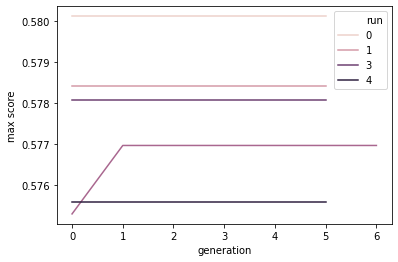

In [9]:
score_by_generation_lineplot(nia_search)

In [10]:
nia_search.best_params_

{'max_depth': 205,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 240}

In [11]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7530    0.7440    0.7485       418
           2     0.7613    0.8460    0.8014       539
           3     0.7558    0.8125    0.7831        80
           4     1.0000    0.6000    0.7500         5
           5     0.5000    0.1053    0.1739        19
           6     0.7500    0.4390    0.5538        41
           7     1.0000    0.5500    0.7097        60

    accuracy                         0.7642      1162
   macro avg     0.7886    0.5853    0.6458      1162
weighted avg     0.7666    0.7642    0.7572      1162



### Hybrid Bat algorithm

In [12]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='hba',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=5,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42)

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits
CPU times: user 34.2 s, sys: 1.04 s, total: 35.2 s
Wall time: 2h 1min 26s


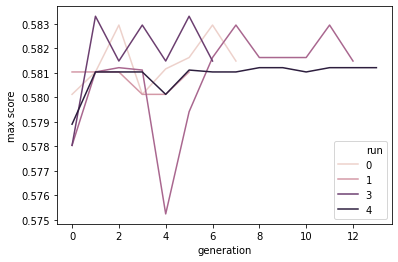

In [13]:
score_by_generation_lineplot(nia_search)

In [14]:
nia_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 360}

In [15]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7580    0.7344    0.7461       418
           2     0.7587    0.8516    0.8024       539
           3     0.7701    0.8375    0.8024        80
           4     1.0000    0.6000    0.7500         5
           5     0.5000    0.1053    0.1739        19
           6     0.7391    0.4146    0.5312        41
           7     1.0000    0.5833    0.7368        60

    accuracy                         0.7659      1162
   macro avg     0.7894    0.5895    0.6490      1162
weighted avg     0.7678    0.7659    0.7587      1162



### Firefly Algorithm

In [16]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='fa',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=5,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42)

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits
CPU times: user 57.7 s, sys: 1.68 s, total: 59.4 s
Wall time: 2h 36min 18s


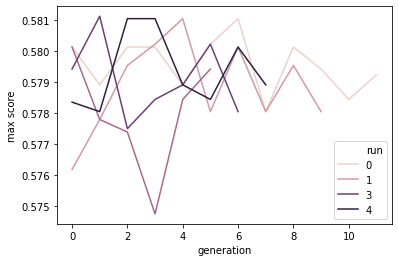

In [17]:
score_by_generation_lineplot(nia_search)

In [18]:
nia_search.best_params_

{'max_depth': 45,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 280}

In [19]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7543    0.7416    0.7479       418
           2     0.7633    0.8497    0.8042       539
           3     0.7701    0.8375    0.8024        80
           4     1.0000    0.6000    0.7500         5
           5     0.5000    0.1053    0.1739        19
           6     0.7500    0.4390    0.5538        41
           7     1.0000    0.5500    0.7097        60

    accuracy                         0.7668      1162
   macro avg     0.7911    0.5890    0.6488      1162
weighted avg     0.7690    0.7668    0.7596      1162



### Grey Wolf Optimizer

In [20]:

%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='gwo',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=5,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42)

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits
CPU times: user 34.4 s, sys: 1.06 s, total: 35.5 s
Wall time: 2h 39s


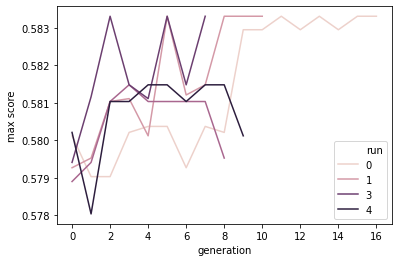

In [21]:
score_by_generation_lineplot(nia_search)

In [22]:
nia_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 360}

In [23]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7580    0.7344    0.7461       418
           2     0.7587    0.8516    0.8024       539
           3     0.7701    0.8375    0.8024        80
           4     1.0000    0.6000    0.7500         5
           5     0.5000    0.1053    0.1739        19
           6     0.7391    0.4146    0.5312        41
           7     1.0000    0.5833    0.7368        60

    accuracy                         0.7659      1162
   macro avg     0.7894    0.5895    0.6490      1162
weighted avg     0.7678    0.7659    0.7587      1162



## Results

| Algorithm | F1 Macro score  | Search duration |
| ------------ |-------------:|-------------:|
| Bat Algorithm | 0.6458 | 44min 5s |
| Hybrid Bat Algorithm | 0.6490 | 2h 1min 26s |
| Firefly Algorithm | 0.6488 | 2h 36min 18s |
| Grey Wolf Optimizer | 0.6490 | 2h 39s  |
